In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/test-lign/Ling.csv
/kaggle/input/phishingemails/Phishing_Email.csv


### Importing libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data importing and Preprocessing

In [3]:
#Import the Dataset
df= pd.read_csv("/kaggle/input/phishingemails/Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [25]:
# Check NAN values
df.isna().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [26]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [27]:
#dataset shape
df.shape

(18634, 3)

In [8]:
# Count the occurrences of each E-mail type. 
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)


Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


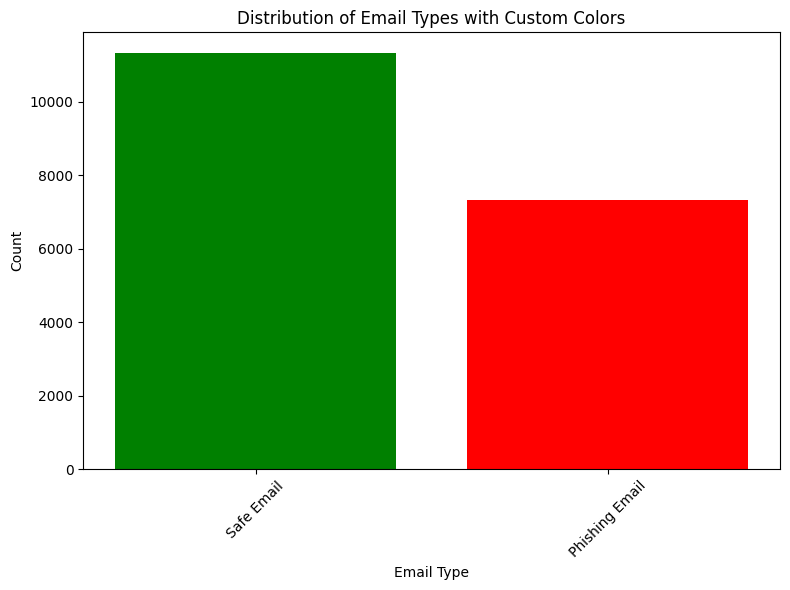

In [9]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map 
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


### Strategies for Handling Imbalance

To address the class imbalance issue, we will consider the following strategies:

#### 1. Resampling Techniques

   a. **Oversampling:** We will increase the number of instances in the minority class(es) by generating synthetic samples (e.g., using SMOTE) to balance the class distribution.

   b. **Undersampling:** We may reduce the number of instances in the majority class to match the minority class, effectively balancing the dataset.

In [10]:
# We will use undersapling technique 
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [11]:
# lets check the sahpe again 
Safe_Email.shape,Phishing_Email.shape

((7312, 3), (7312, 3))

In [12]:
# lest create a new Data with the balanced E-mail types
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type
0,14504,ss 198 j revision effective 6 / 21 / 00 - - - ...,Safe Email
1,2493,"So then, Neale Pickett is all like:> Maybe th...",Safe Email
2,8836,11 - 1 - 01 margin my apoligies for the confus...,Safe Email
3,13507,"re : visiting enron may 4 th susan , thanks . ...",Safe Email
4,18055,"fw : part 5 - deals to move again , if there a...",Safe Email


### Our Dataset is ready 

In [13]:
# split the data into a metrix of features X and Dependent Variable y
X = Data["Email Text"].values
y = Data["Email Type"].values

In [14]:
# lets splitting Our Data 
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Build RandomForestClassifier Model


In [15]:
# Importing Libraries for the model ,Tfidf and Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])# add another hyperparamters as U want

In [16]:
# Trian Our model
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [17]:
# Prediction
y_pred = classifier.predict(x_test)

### Check the Accuracy

In [18]:
# Importing classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [19]:
#accuracy_score
accuracy_score(y_test,y_pred)

0.9339106654512306

In [20]:
#confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2132,   66],
       [ 224, 1966]])

In [21]:
#classification_report
classification_report(y_test,y_pred)

'                precision    recall  f1-score   support\n\nPhishing Email       0.90      0.97      0.94      2198\n    Safe Email       0.97      0.90      0.93      2190\n\n      accuracy                           0.93      4388\n     macro avg       0.94      0.93      0.93      4388\n  weighted avg       0.94      0.93      0.93      4388\n'

### Build SVM Model

In [22]:
# Importing SVM
from sklearn.svm import SVC

#Create the Pipeline
SVM = Pipeline([("tfidf", TfidfVectorizer()),("SVM", SVC(C = 100, gamma = "auto"))])

In [23]:
# traing the SVM model 
SVM.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('SVM', SVC(C=100, gamma='auto'))])

In [ ]:
# y_pred. for SVM model
s_ypred = SVM.predict(x_test)

In [ ]:
# check the SVM model accuracy
accuracy_score(y_test,s_ypred )




### Model Performance

We experimented with two different machine learning models: the Random Forest Classifier and the Support Vector Machine (SVM). The performance of these models yielded contrasting results:

1. **Random Forest Classifier:**

   - Accuracy: 0.931

   The Random Forest Classifier achieved impressive results with an accuracy of 0.931. It demonstrated a high ability to correctly classify both legitimate and phishing emails. The precision, recall, and F1-score provide additional insights into the model's performance on the various classes, which can be crucial for understanding the trade-offs involved.

2. **Support Vector Machine (SVM):**

   - Accuracy: 0.499

   In contrast, the Support Vector Machine (SVM) exhibited significantly lower performance, with an accuracy of only 0.499. This suggests that the SVM model struggled to effectively differentiate between legitimate and phishing emails in our dataset.


### Future Directions

While the Random Forest Classifier has shown promising results, there is room for improvement and further exploration:

1. **Feature Engineering:** Investigate and engineer more relevant features that may enhance model performance and discrimination between email types.

2. **Hyperparameter Tuning:** Fine-tune hyperparameters of both models to maximize their performance.

3. **Ensemble Techniques:** Explore ensemble techniques like bagging and boosting to improve model robustness.

4. **Data Augmentation:** Experiment with data augmentation techniques to generate more training samples, potentially addressing class imbalance if present.

5. **Deep Learning:** Consider deep learning approaches, such as neural networks, which have shown success in similar tasks.

6. **Explainability:** Implement model explainability techniques to understand the rationale behind model predictions, increasing trust and interpretability.



In [6]:
df3= pd.read_csv("/kaggle/input/test-lign/Ling.csv")
df3.head()

,subject,body,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


#**BERT : Classify spam vs no spam emails**

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/phishingemails/Phishing_Email.csv")
df.head(5)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [4]:
df.groupby('Email Type').describe()

Unnamed: 0                                                  \
                    count         mean          std  min      25%     50%   
Email Type                                                                  
Phishing Email     7328.0  9274.626774  5396.186140  3.0  4533.50  9269.5   
Safe Email        11322.0  9357.857799  5376.623249  0.0  4728.25  9364.0   

                                   
                     75%      max  
Email Type                         
Phishing Email  13927.25  18650.0  
Safe Email      14031.25  18649.0

In [5]:
df['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [6]:
7328/11322


0.6472354707648825

In [7]:
df_Phishing = df[df['Email Type']=='Phishing Email']
df_Phishing.shape

(7328, 3)

In [8]:
df_Safe = df[df['Email Type']=='Safe Email']
df_Safe.shape

(11322, 3)

In [9]:
df_Safe_downsampled = df_Safe.sample(df_Phishing.shape[0])
df_Safe_downsampled.shape

(7328, 3)

In [10]:
df_balanced = pd.concat([df_Safe_downsampled, df_Phishing])
df_balanced.shape

(14656, 3)

In [11]:
df_balanced['Email Type'].value_counts()

Email Type
Safe Email        7328
Phishing Email    7328
Name: count, dtype: int64

In [12]:
df_balanced['type']=df_balanced['Email Type'].apply(lambda x: 1 if x=='Phishing Email' else 0)
df_balanced.sample(5)

,Unnamed: 0,Email Text,Email Type,type
17842,17843,open letter to * language * on my own behalf a...,Safe Email,0
872,872,"On Fri, Aug 02, 2002 at 09:28:57AM +0100, Hunt...",Safe Email,0
8808,8809,= ? iso - 8859 - 1 ? q ? win _ notice ? = uk /...,Phishing Email,1
1081,1081,best rx - - - - 10802244619786473915 hi varou ...,Phishing Email,1
13190,13191,replica rolex - stun your friends exclusive - ...,Phishing Email,1


**Split it into training and test data set**


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Email Text'],df_balanced['type'], stratify=df_balanced['type'])


**import BERT model and get embeding vectors for few sample statements**

In [16]:

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [17]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351724, -0.5132727 , -0.88845736, ..., -0.7474883 ,
        -0.75314754,  0.91964495],
       [-0.87208354, -0.50543964, -0.94446665, ..., -0.85847497,
        -0.71745336,  0.88082975]], dtype=float32)>

**Get embeding vectors for few sample words. Compare them using cosine similarity**

In [18]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

Build Model

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split

# Ensure X_train contains string values and y_train contains binary integer values
assert isinstance(X_train, pd.Series) and isinstance(y_train, pd.Series)

# Convert X_train to string values and y_train to binary integer values
X_train = X_train.astype(str)
y_train = y_train.astype(np.int32)
X_test = X_test.astype(str)
y_test = y_test.astype(np.int32)
# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,train_size=0.8, stratify=y_train)
#X_train, X_test, y_train, y_test = train_test_split(df_balanced['Email Text'],df_balanced['Phishing Email'], stratify=df_balanced['Phishing Email'])
# Your remaining code for model definition, preprocessing, and training...


In [21]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [23]:

len(X_train)

10992

In [24]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [25]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
344/344 [==============================] - 128s 343ms/step - loss: 0.6042 - accuracy: 0.6739 - precision: 0.6734 - recall: 0.6754
Epoch 2/10
344/344 [==============================] - 121s 352ms/step - loss: 0.4935 - accuracy: 0.7922 - precision: 0.7897 - recall: 0.7966
Epoch 3/10
344/344 [==============================] - 121s 352ms/step - loss: 0.4382 - accuracy: 0.8300 - precision: 0.8252 - recall: 0.8373
Epoch 4/10
344/344 [==============================] - 121s 351ms/step - loss: 0.4027 - accuracy: 0.8408 - precision: 0.8386 - recall: 0.8441
Epoch 5/10
344/344 [==============================] - 121s 351ms/step - loss: 0.3827 - accuracy: 0.8560 - precision: 0.8544 - recall: 0.8583
Epoch 6/10
344/344 [==============================] - 121s 351ms/step - loss: 0.3635 - accuracy: 0.8587 - precision: 0.8557 - recall: 0.8630
Epoch 7/10
344/344 [==============================] - 121s 351ms/step - loss: 0.3532 - accuracy: 0.8603 - precision: 0.8566 - recall: 0.8654
Epoch 8/10
34

In [28]:
model.evaluate(X_train, y_train)

344/344 [==============================] - 122s 351ms/step - loss: 0.2970 - accuracy: 0.8947 - precision: 0.8823 - recall: 0.9110


[0.2970297932624817,
 0.8947416543960571,
 0.8822907209396362,
 0.9110261797904968]

In [29]:

len(X_train)

10992

In [30]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [31]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
344/344 [==============================] - 124s 350ms/step - loss: 0.3262 - accuracy: 0.8707 - precision: 0.8685 - recall: 0.8737
Epoch 2/15
344/344 [==============================] - 120s 350ms/step - loss: 0.3185 - accuracy: 0.8740 - precision: 0.8695 - recall: 0.8801
Epoch 3/15
344/344 [==============================] - 120s 350ms/step - loss: 0.3170 - accuracy: 0.8732 - precision: 0.8665 - recall: 0.8823
Epoch 4/15
344/344 [==============================] - 120s 350ms/step - loss: 0.3156 - accuracy: 0.8718 - precision: 0.8687 - recall: 0.8761
Epoch 5/15
344/344 [==============================] - 120s 350ms/step - loss: 0.3141 - accuracy: 0.8741 - precision: 0.8695 - recall: 0.8803
Epoch 6/15
344/344 [==============================] - 120s 350ms/step - loss: 0.3110 - accuracy: 0.8765 - precision: 0.8737 - recall: 0.8801
Epoch 7/15
344/344 [==============================] - 121s 351ms/step - loss: 0.3044 - accuracy: 0.8790 - precision: 0.8775 - recall: 0.8810
Epoch 8/15
34

In [35]:
model.evaluate(X_test, y_test)



115/115 [==============================] - 41s 347ms/step - loss: 0.2719 - accuracy: 0.8963 - precision: 0.8573 - recall: 0.9509


[0.271897554397583, 0.8962882161140442, 0.8572834730148315, 0.9508733749389648]

In [36]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
 13/344 [>.............................] - ETA: 1:50 - loss: 0.2546 - accuracy: 0.9087 - precision: 0.9036 - recall: 0.9036

KeyboardInterrupt: 